<a href="https://colab.research.google.com/github/AbiaAlvesReis/Projeto-IA-2022-01/blob/main/AMMS_ML_keras_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import pandas as pd

import keras
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for each game (draw), we have 60 balls numbered from 1 to 60 inside a bowl. Then, 6 of them are chosen and the result is shown. eg: 14-31-32-05-59-41
# for this purpose, we will try to predict just the first number

# functions

def ldata(m,t):

    # load the data from all the games happened until 31/12/2017
    # m is the number of training examples ; t is the number of test examples
    # the output is extracting just the first number of the each game.

    jogo = pd.read_excel('/content/drive/MyDrive/2022/IA - projeto/megasColunasFormatada.xlsx', parse_dates=True, index_col=1)

    dataset = {}

    X_train = np.zeros((4,m-t))
    Y_train = np.zeros((60,m-t))
    X_test = np.zeros((4,t))
    Y_test = np.zeros((60,t))
 
    X_train[0][:] = jogo.values[0][0:m-t]   #number of the game
    X_train[1][:] = jogo.values[3][:m-t]    # day of the game
    X_train[2][:] = jogo.values[4][0:m-t]   # month of the game
    X_train[3][:] = jogo.values[5][0:m-t]   #year of the game
    X_train = X_train.T;

    X_test[0][:] = jogo.values[0][m-t:m]
    X_test[1][:] = jogo.values[3][m-t:m]
    X_test[2][:] = jogo.values[4][m-t:m]
    X_test[3][:] = jogo.values[5][m-t:m]
    X_test = X_test.T;
    
    Y_train = jogo.values[7][0:m-t];    #the number of the first ball of the game
    Y_train = Y_train.T;
    Y_train = Y_train.astype(int)
    Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes=61)   #turn it into on hot vector

    Y_test = jogo.values[7][m-t:m];
    Y_test = Y_test.T;
    Y_test = Y_test.astype(int)
    Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes=61)
                

    dataset["X_train"] = X_train
    dataset["X_test"] = X_test
    dataset["Y_train"] = Y_train
    dataset["Y_test"] = Y_test
    
    return dataset

def modelo(m, t, epoc, bat, v):

    # m is the number of training examples ; t is the number of test examples
    # epoc for epochs; bat for batches;
    # v for verbose in model fit. (0 = no progress is shown; 1 = progress bar; 2 = shows just the final loss and accuracy for each epoch)

    #testing the model, I run: m1, l1, c1, y1 = modelo(1900, 10, 10, 32,2);

    dados = ldata(m, t);

    i_shape = dados["X_train"].shape[1] #input shape
    o_shape = dados["Y_train"].shape[1] #output shape

    x_train = dados['X_train']
    y_train = dados['Y_train']
    x_test = dados['X_test']
    y_test = dados['Y_test']

    model = Sequential()
    model.add(Dense(150, activation='relu', input_dim=i_shape))
    #model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(o_shape, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epoc, batch_size=bat, verbose=v, validation_split=0.1, shuffle=True)

    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=bat)

    classes = model.predict(x_test, batch_size=bat)

    return model, loss_and_metrics, classes, y_test, dados

m1, l1, c1, y1, data = modelo(1900, 10, 10, 32, 2);

print(m1);
print(l1);
print(c1);
print(y1);
    

Epoch 1/10
54/54 - 1s - loss: 52.3179 - accuracy: 0.0153 - val_loss: 24.2347 - val_accuracy: 0.0317 - 1s/epoch - 25ms/step
Epoch 2/10
54/54 - 0s - loss: 6.3921 - accuracy: 0.0159 - val_loss: 4.1200 - val_accuracy: 0.0212 - 111ms/epoch - 2ms/step
Epoch 3/10
54/54 - 0s - loss: 4.1085 - accuracy: 0.0147 - val_loss: 4.1195 - val_accuracy: 0.0212 - 122ms/epoch - 2ms/step
Epoch 4/10
54/54 - 0s - loss: 4.1064 - accuracy: 0.0188 - val_loss: 4.1191 - val_accuracy: 0.0106 - 134ms/epoch - 2ms/step
Epoch 5/10
54/54 - 0s - loss: 4.1043 - accuracy: 0.0235 - val_loss: 4.1190 - val_accuracy: 0.0159 - 129ms/epoch - 2ms/step
Epoch 6/10
54/54 - 0s - loss: 4.1023 - accuracy: 0.0235 - val_loss: 4.1187 - val_accuracy: 0.0159 - 117ms/epoch - 2ms/step
Epoch 7/10
54/54 - 0s - loss: 4.1005 - accuracy: 0.0235 - val_loss: 4.1186 - val_accuracy: 0.0159 - 121ms/epoch - 2ms/step
Epoch 8/10
54/54 - 0s - loss: 4.0988 - accuracy: 0.0235 - val_loss: 4.1188 - val_accuracy: 0.0159 - 111ms/epoch - 2ms/step
Epoch 9/10
54/54

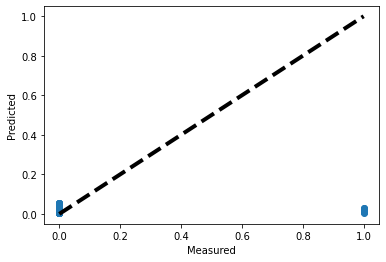

In [ ]:
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(y1, c1)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()